<a href="https://colab.research.google.com/github/NiloofarSoltani-2/Smart-Water-Management/blob/main/smart_water_management.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Introduction

## Data Structure

In [14]:
df = pd.read_csv('/content/sample_data/aquifers_fe.csv')
df.shape

(8154, 6)

In [15]:
print (df.head())

   Mean_Rainfall  Mean_Temp  Actual_Depth  Actual_Volume  Actual_Hydrometry  \
0       0.415556     6.6250      -6.08026   -8019.271158          -0.083056   
1       2.054444     6.0750      -6.06452   -7956.571285          -0.104167   
2       0.921111     9.0875      -6.15706   -7715.808854           0.011944   
3       0.878889    12.3250      -6.10774   -7731.378766          -0.008611   
4       0.908889    12.6500      -6.05310   -7812.676449          -0.072222   

         Date  
0  1998-01-04  
1  1998-01-05  
2  1998-01-06  
3  1998-01-07  
4  1998-01-08  


In [16]:
df. columns

Index(['Mean_Rainfall', 'Mean_Temp', 'Actual_Depth', 'Actual_Volume',
       'Actual_Hydrometry', 'Date'],
      dtype='object')

In [17]:
df.isnull().sum()

,0
Mean_Rainfall,0
Mean_Temp,0
Actual_Depth,0
Actual_Volume,0
Actual_Hydrometry,0
Date,0


## Cleaning


*   Missing Values = 0
*   Duplicate Values = 0
*   Convert Date Format (Indexing)
*   Time Frequency Consistency



In [18]:
df.columns = df.columns.str.lower()
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

In [31]:
df. columns

Index(['mean_rainfall', 'mean_temp', 'actual_depth', 'actual_volume',
       'actual_hydrometry'],
      dtype='object')

In [19]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
print(missing_values)

Series([], dtype: int64)


In [32]:
print("Total duplicate rows:", df.duplicated().sum())

Total duplicate rows: 0


In [33]:
df.index.to_series().diff().value_counts()

,count
date,
1 days,8131
3 days,8
7 days,6
26 days,3
25 days,2
4 days,1
23 days,1
20 days,1


8131 records occur at exactly 1-day intervals ==> dataset is primarily daily

Total anomalies: 23 rows

    Risk for Model Accuracy

    Models like ARIMA, Prophet, LSTM require uniform time intervals

    Gaps can lead to:

    Distorted trend/seasonality analysis

    Reduced prediction accuracy

    Misleading results if left uncorrected




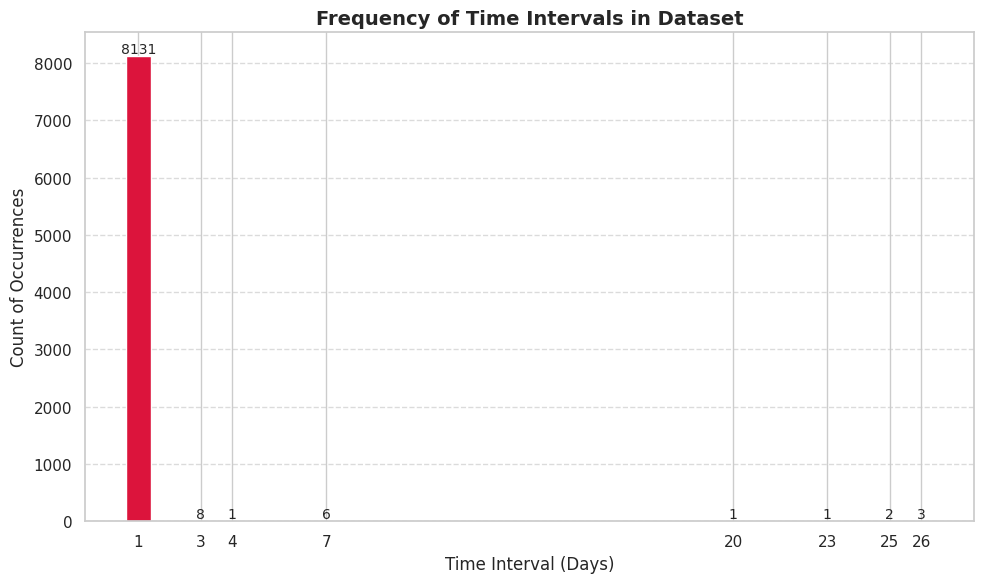

In [39]:
time_deltas = df.index.to_series().diff().value_counts().sort_index()
delta_days = time_deltas.index.days
counts = time_deltas.values

plt.figure(figsize=(10, 6))
bars = plt.bar(delta_days, counts, color='crimson')
plt.title('Frequency of Time Intervals in Dataset', fontsize=14, weight='bold')
plt.xlabel('Time Interval (Days)', fontsize=12)
plt.ylabel('Count of Occurrences', fontsize=12)
plt.xticks(delta_days)

for i in range(len(delta_days)):
    plt.text(delta_days[i], counts[i] + 0.5, str(counts[i]),
             ha='center', va='bottom', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
